In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm

In [4]:
sns.set_theme(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

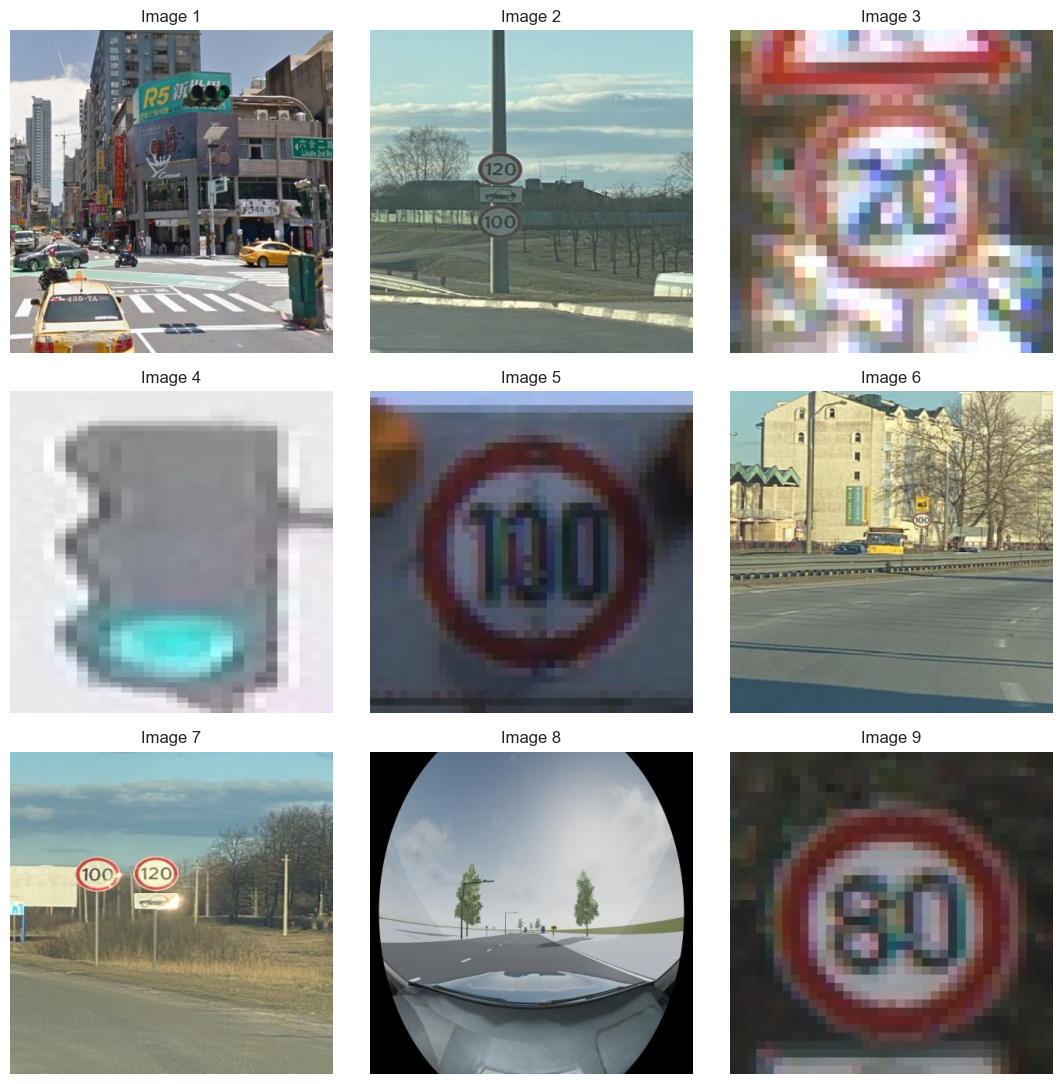

In [6]:
Image_dir = 'car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

100%|██████████| 6.25M/6.25M [00:00<00:00, 8.01MB/s]



image 1/1 c:\Users\imsiv\Desktop\newTraffic\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 24.5ms
Speed: 9.0ms preprocess, 24.5ms inference, 64.2ms postprocess per image at shape (1, 3, 640, 640)


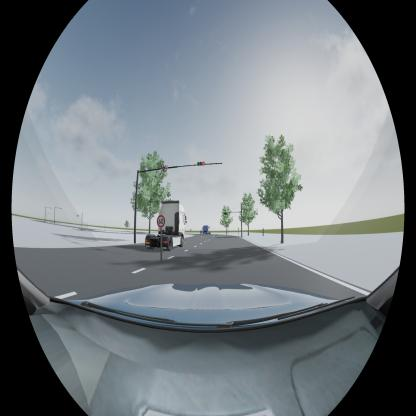

In [7]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [9]:
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

New https://pypi.org/project/ultralytics/8.3.23 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.18  Python-3.11.5 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

100%|██████████| 5.35M/5.35M [00:00<00:00, 5.65MB/s]


AMP: checks passed 
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU) 4.00G total, 0.11G reserved, 0.08G allocated, 3.81G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.201         96.03         413.5        (1, 3, 640, 640)                    list
     3013773       16.42         0.308         113.3         96.11        (2, 3, 640, 640)                    list
     3013773       32.84         0.547         109.6         107.3        (4, 3, 640, 640)                    list
     3013773       65.67         0.992         207.3         199.3        (8, 3, 640, 640)                    list
     3013773       131.3         1.900         412.1         371.3       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 19 for CUDA:0 2.43G/4.00G (61%) 


train: Scanning C:\Users\imsiv\Desktop\newTraffic\car\train\labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:06<00:00, 507.76it/s]


train: New cache created: C:\Users\imsiv\Desktop\newTraffic\car\train\labels.cache


val: Scanning C:\Users\imsiv\Desktop\newTraffic\car\valid\labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 574.42it/s]


val: New cache created: C:\Users\imsiv\Desktop\newTraffic\car\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00044531249999999996), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.67G     0.8452      3.465      1.187         38        640: 100%|██████████| 186/186 [03:49<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]


                   all        801        944      0.261      0.519      0.284      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.67G     0.7567        2.5      1.091         26        640: 100%|██████████| 186/186 [03:45<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.315      0.612      0.388      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.67G     0.7495      2.122      1.076         36        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.362      0.594      0.476      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.67G      0.737      1.777      1.066         33        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.618      0.685      0.703      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.67G     0.7047      1.493      1.047         20        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.709       0.66      0.753      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.67G     0.6746      1.334      1.029         27        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.814      0.732      0.814      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.67G      0.671      1.219      1.024         33        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.896      0.751      0.857      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.67G     0.6493      1.096      1.018         27        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.898      0.784      0.873      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.67G     0.6424      1.037      1.014         22        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.879       0.78      0.873      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.67G     0.6297     0.9726       1.01         29        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.884      0.839      0.908      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.67G     0.6277     0.9362          1         36        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944       0.88      0.838      0.903       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.67G     0.6158     0.8861          1         33        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.917      0.816      0.903      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.69G     0.6054     0.8599     0.9905         45        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.925      0.833      0.919      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.69G     0.5909     0.8214     0.9874         45        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.952      0.838      0.932      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.69G       0.59     0.7892     0.9864         43        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.937      0.856      0.935       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.67G     0.5782     0.7584      0.978         29        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.06it/s]

                   all        801        944      0.951      0.833      0.939      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.67G     0.5814     0.7649     0.9794         36        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.07it/s]

                   all        801        944      0.903      0.873      0.934      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.67G     0.5685     0.7346     0.9768         25        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.935       0.87       0.94      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.67G     0.5674      0.715     0.9736         25        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.915      0.875       0.93      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.67G     0.5572     0.6751      0.968         27        640: 100%|██████████| 186/186 [03:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.938      0.857      0.944      0.805


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.67G     0.5634     0.5072      0.946         18        640: 100%|██████████| 186/186 [03:42<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.938      0.885      0.949      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.67G     0.5532     0.4827     0.9401         25        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.925      0.888      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.67G     0.5417     0.4554     0.9343         17        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.949      0.874      0.951      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.67G     0.5357     0.4322     0.9259         16        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.917      0.901      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.67G     0.5312     0.4113     0.9268         17        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.956       0.89      0.954       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.67G       0.52     0.4022     0.9175         15        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.939      0.897      0.957      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.67G     0.5153     0.3891     0.9137         19        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.963      0.893      0.957      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.67G       0.51     0.3775     0.9103         20        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.09it/s]

                   all        801        944      0.945      0.905       0.96       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.67G     0.5013     0.3671     0.9083         16        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.958        0.9      0.959      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.67G     0.4971     0.3652     0.9039         20        640: 100%|██████████| 186/186 [03:42<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:20<00:00,  1.08it/s]

                   all        801        944      0.949      0.902      0.962      0.832



30 epochs completed in 2.045 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.3MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.18  Python-3.11.5 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:18<00:00,  1.21it/s]


                   all        801        944      0.954      0.901      0.959      0.833
           Green Light         87        122      0.875      0.738      0.839      0.501
             Red Light         74        108      0.861      0.667      0.815      0.512
       Speed Limit 100         52         52      0.944      0.923      0.982      0.891
       Speed Limit 110         17         17      0.948      0.941      0.974      0.898
       Speed Limit 120         60         60      0.983      0.988      0.994      0.914
        Speed Limit 20         56         56       0.99      0.982      0.986      0.877
        Speed Limit 30         71         74      0.937      0.959      0.979      0.924
        Speed Limit 40         53         55      0.959      0.982      0.992       0.89
        Speed Limit 50         68         71      0.981      0.859      0.979      0.873
        Speed Limit 60         76         76      0.945      0.934      0.964      0.887
        Speed Limit 7

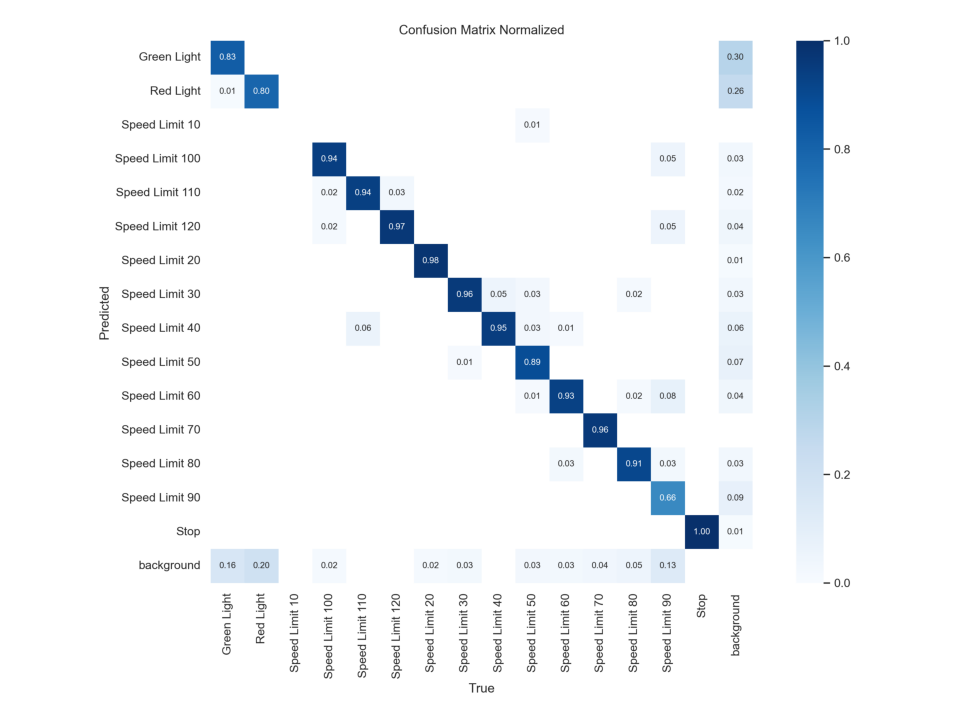

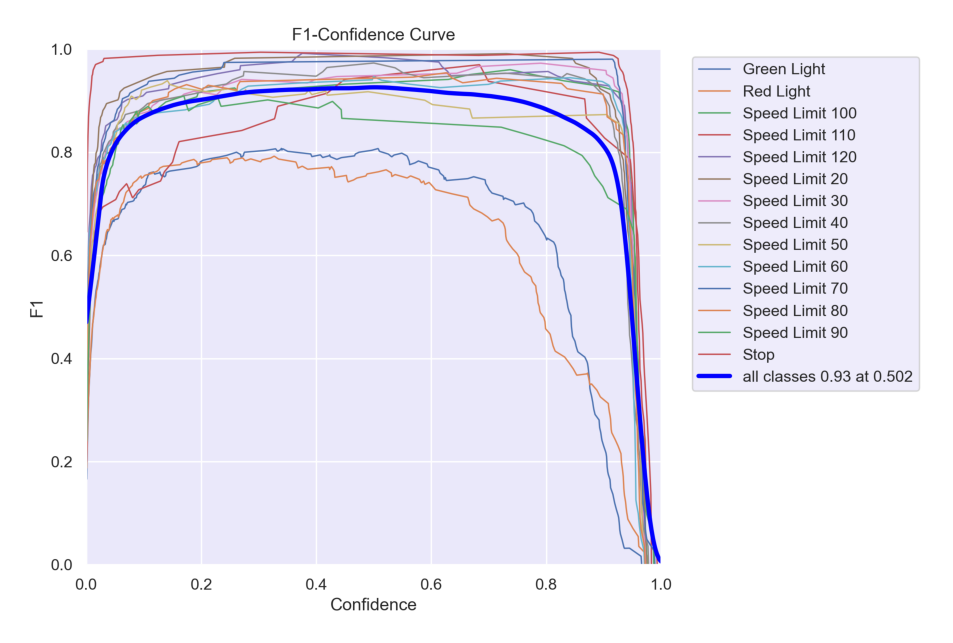

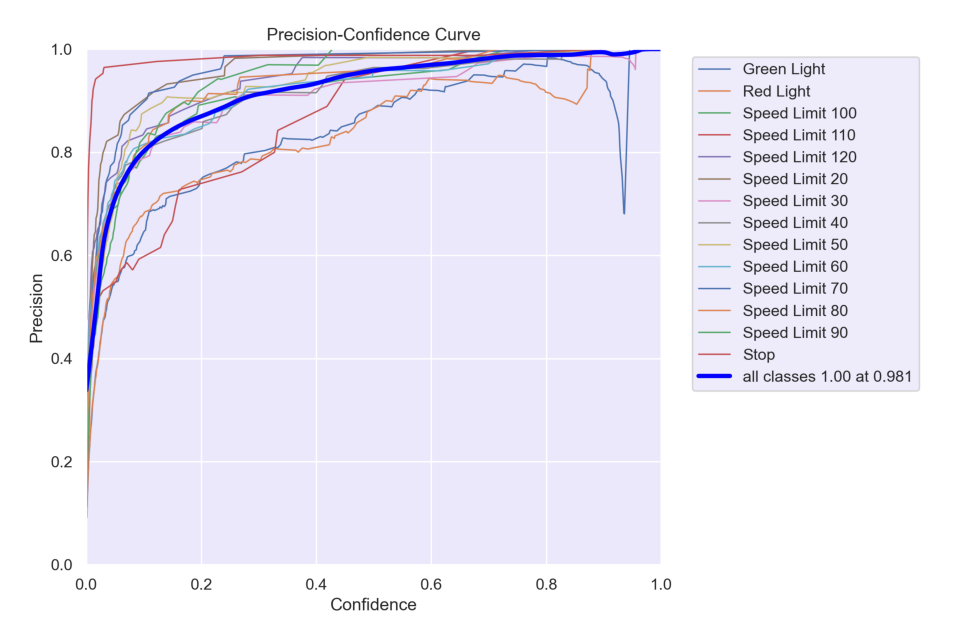

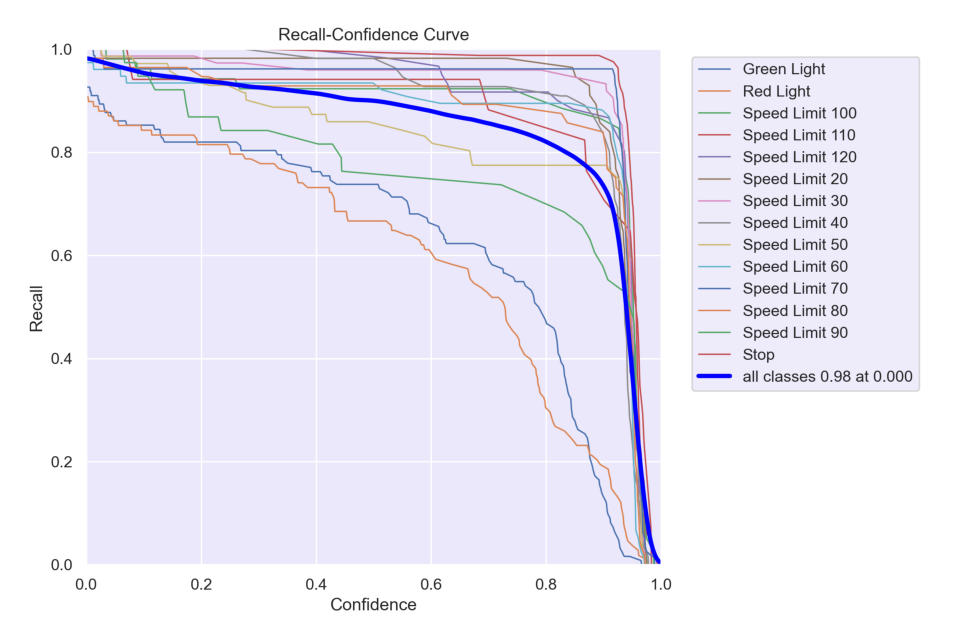

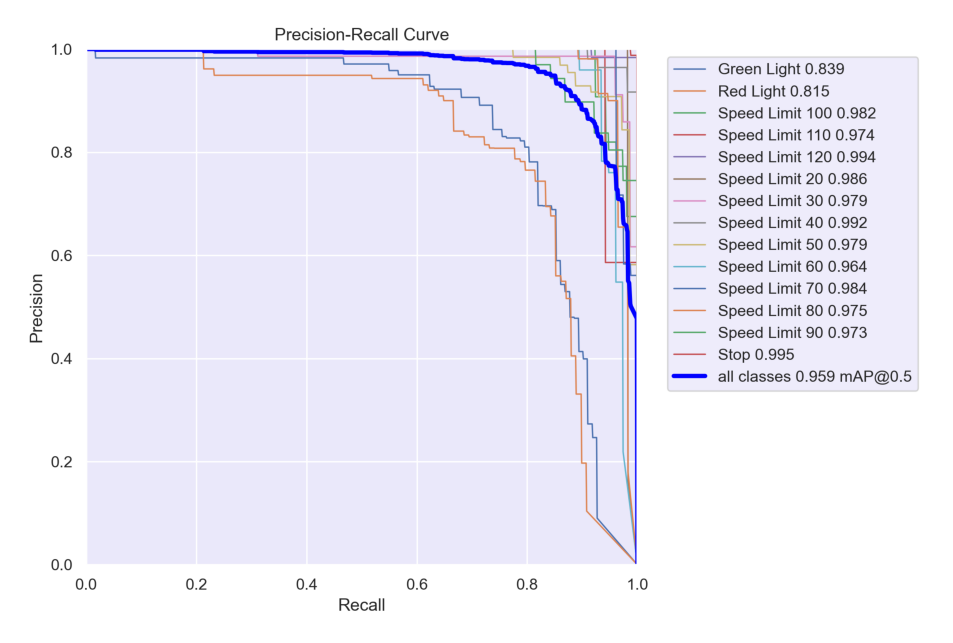

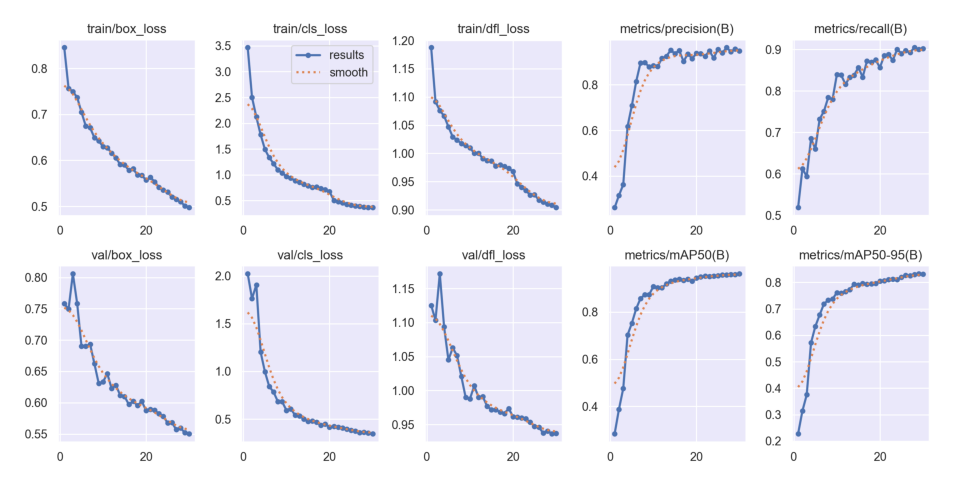

In [14]:

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'runs\\detect\\train2'

# Display the images
display_images(post_training_files_path, image_files)

In [16]:
Valid_model = YOLO('runs\\detect\\train2\\weights\\best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.18  Python-3.11.5 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\imsiv\Desktop\newTraffic\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:30<00:00,  1.69it/s]


                   all        801        944      0.954      0.901       0.96      0.834
           Green Light         87        122      0.874      0.738      0.838      0.504
             Red Light         74        108       0.86      0.667      0.817      0.508
       Speed Limit 100         52         52      0.943      0.923      0.982      0.899
       Speed Limit 110         17         17      0.948      0.941      0.974      0.904
       Speed Limit 120         60         60      0.983      0.988      0.994      0.914
        Speed Limit 20         56         56       0.99      0.982      0.986      0.878
        Speed Limit 30         71         74      0.937      0.959      0.979      0.921
        Speed Limit 40         53         55      0.959      0.982      0.991      0.896
        Speed Limit 50         68         71       0.98      0.859      0.979      0.875
        Speed Limit 60         76         76      0.945      0.934      0.969      0.887
        Speed Limit 7


0: 640x640 1 Speed Limit 30, 57.6ms
Speed: 7.3ms preprocess, 57.6ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 54.5ms
Speed: 6.1ms preprocess, 54.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 52.6ms
Speed: 6.1ms preprocess, 52.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 51.5ms
Speed: 6.0ms preprocess, 51.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Speed Limit 70s, 50.5ms
Speed: 6.0ms preprocess, 50.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 24.9ms
Speed: 6.1ms preprocess, 24.9ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Red Light, 23.9ms
Speed: 6.1ms preprocess, 23.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 1 Red Light, 24.5ms
Speed: 4.0ms preprocess, 24.5m

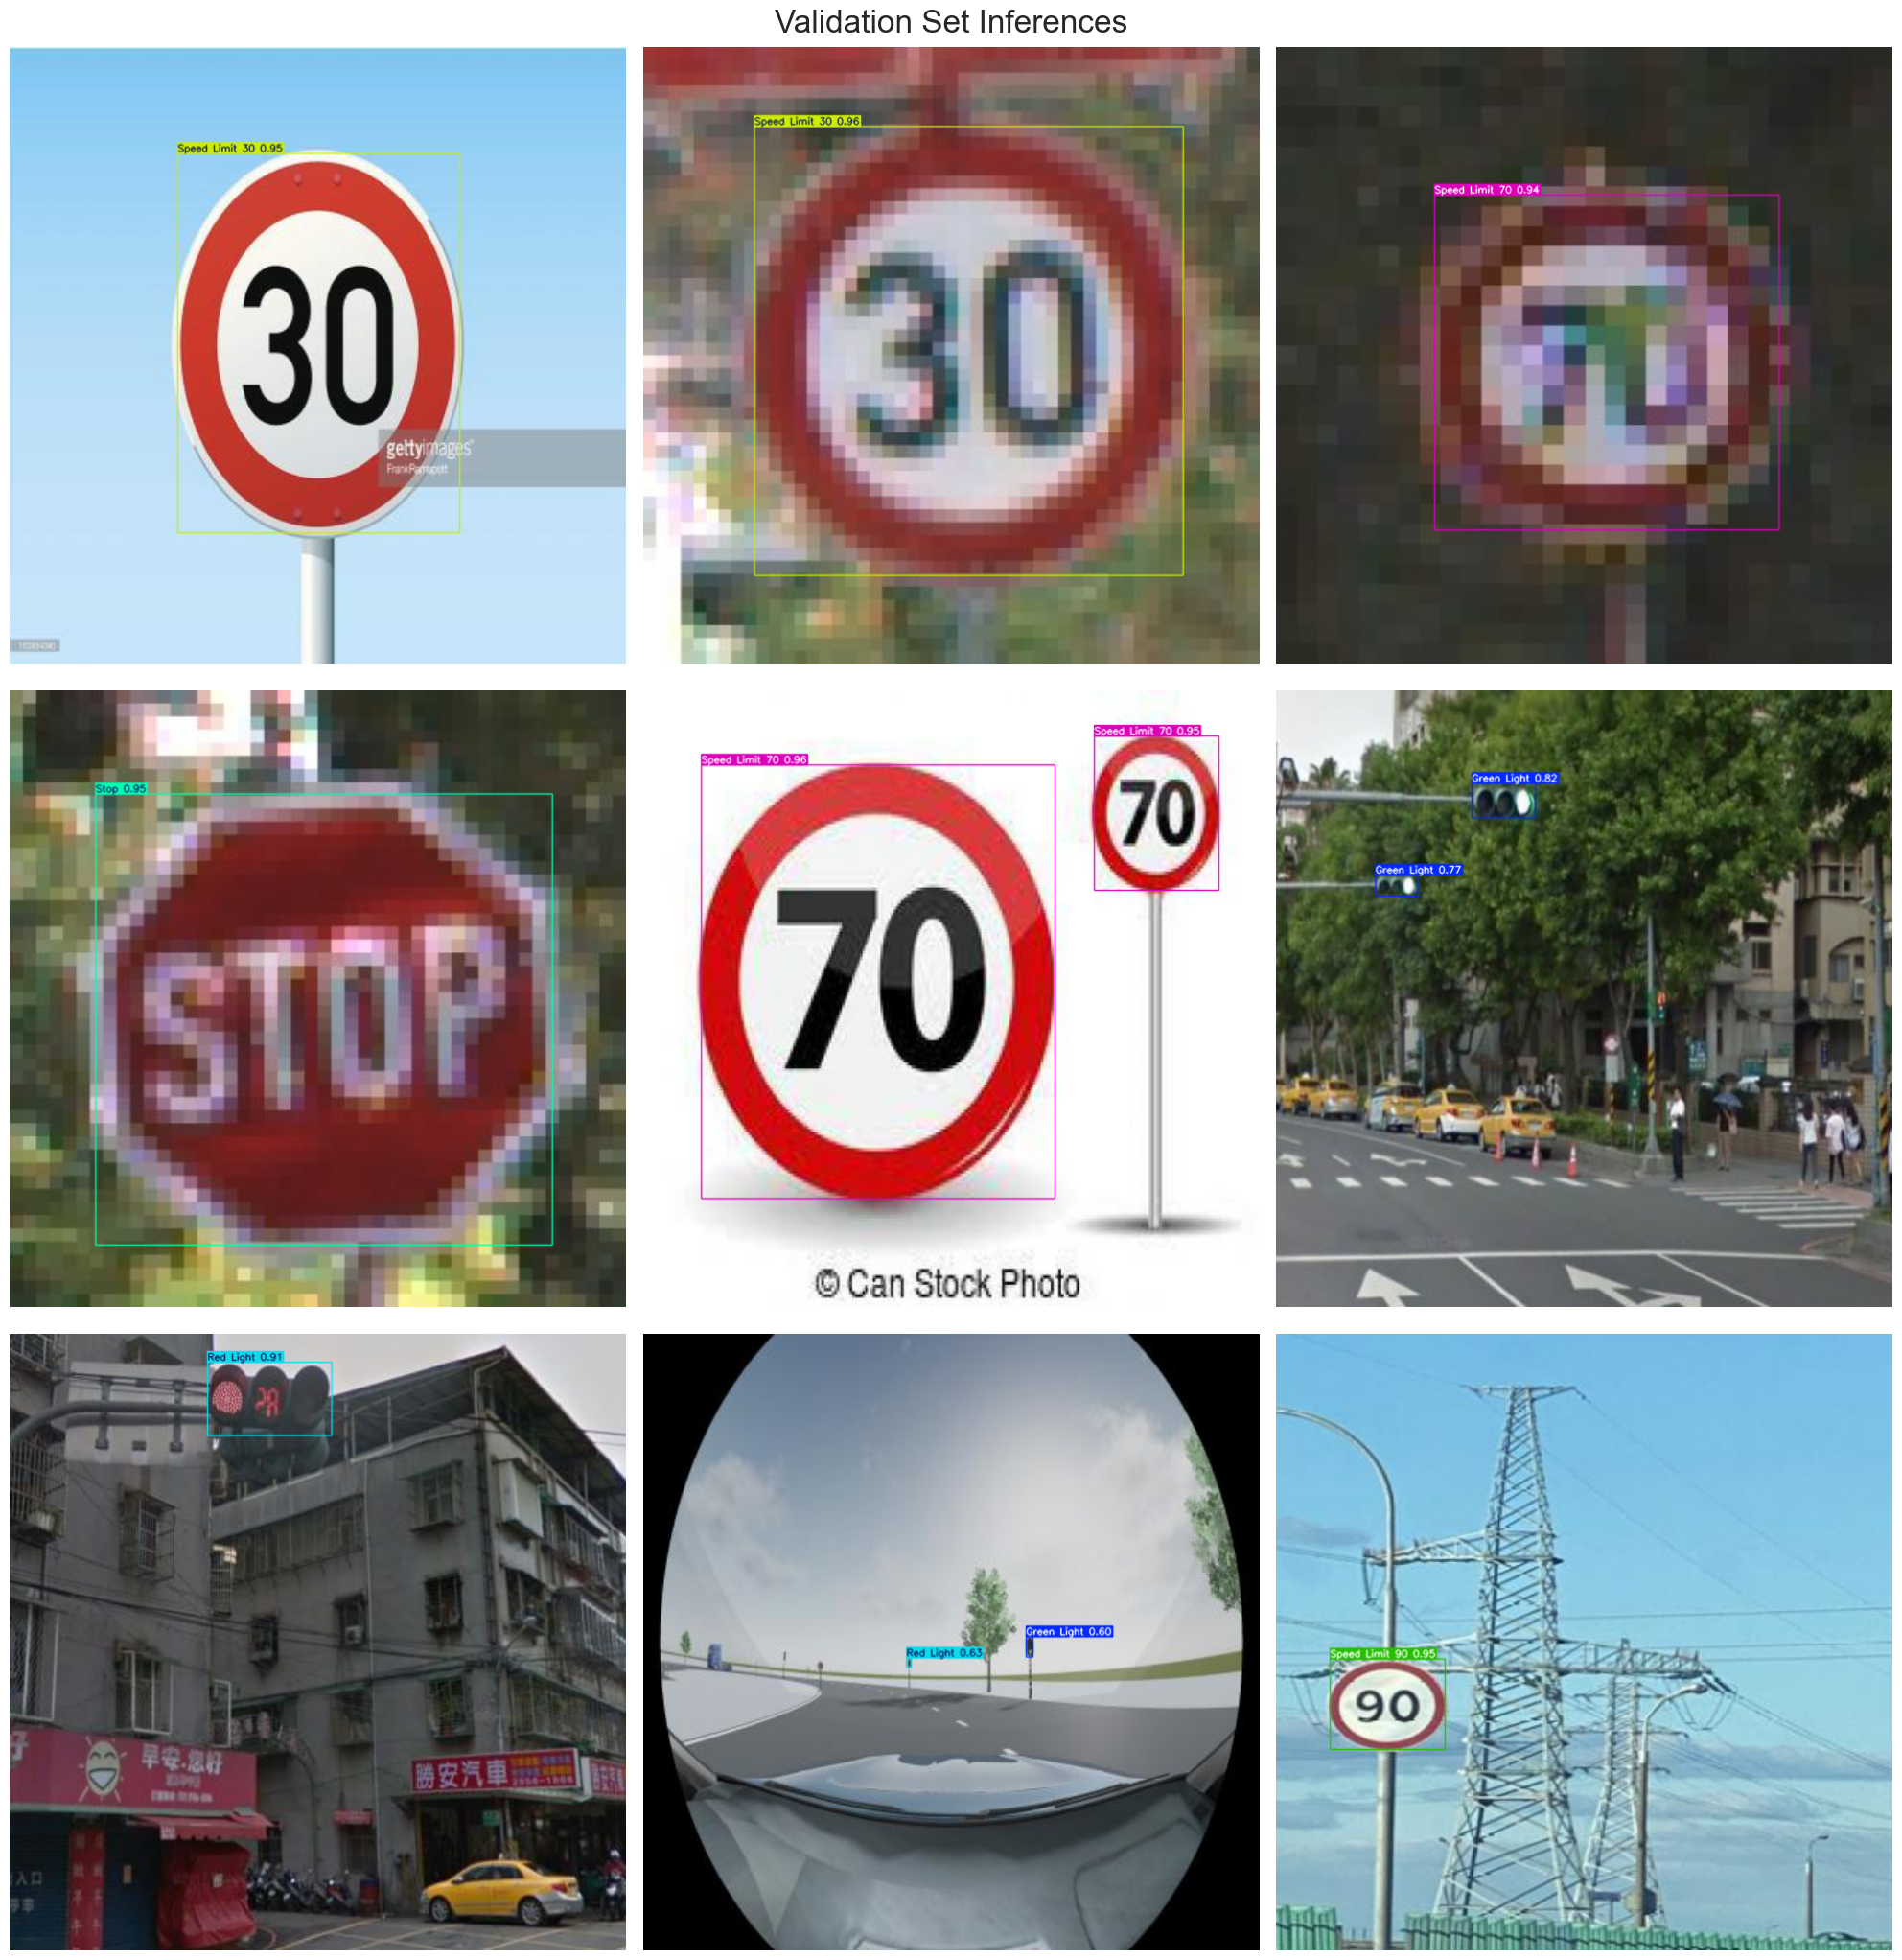

In [18]:
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()